<a href="https://colab.research.google.com/github/Advay-21/College_Experiments/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MultiArmedBandit:
    def __init__(self, k):
        self.k = k
        self.true_win_rates = np.random.rand(k)
        self.estimated_win_rates = np.zeros(k)
        self.action_counts = np.zeros(k)

    def pull_arm(self, arm):
        """Simulates pulling an arm; returns 1 for a win and 0 for a loss."""
        return 1 if np.random.rand() < self.true_win_rates[arm] else 0

    def select_arm(self, epsilon):
        """Selects an arm using the epsilon-greedy strategy."""
        if np.random.rand() < epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.estimated_win_rates)

    def update_estimates(self, arm, reward):
        """Updates the estimated win rate of the selected arm."""
        self.action_counts[arm] += 1
        self.estimated_win_rates[arm] += (reward - self.estimated_win_rates[arm]) / self.action_counts[arm]

    def run(self, epsilon, steps):
        """Runs the bandit simulation for a given epsilon over a number of steps."""
        total_wins = 0
        win_rates = []
        for _ in range(steps):
            arm = self.select_arm(epsilon)
            reward = self.pull_arm(arm)
            self.update_estimates(arm, reward)
            total_wins += reward
            win_rates.append(total_wins / (_ + 1))
        return win_rates

In [ ]:
epsilons = [0.01, 0.1, 0.2, 0.5, 0.9]
steps = 1000

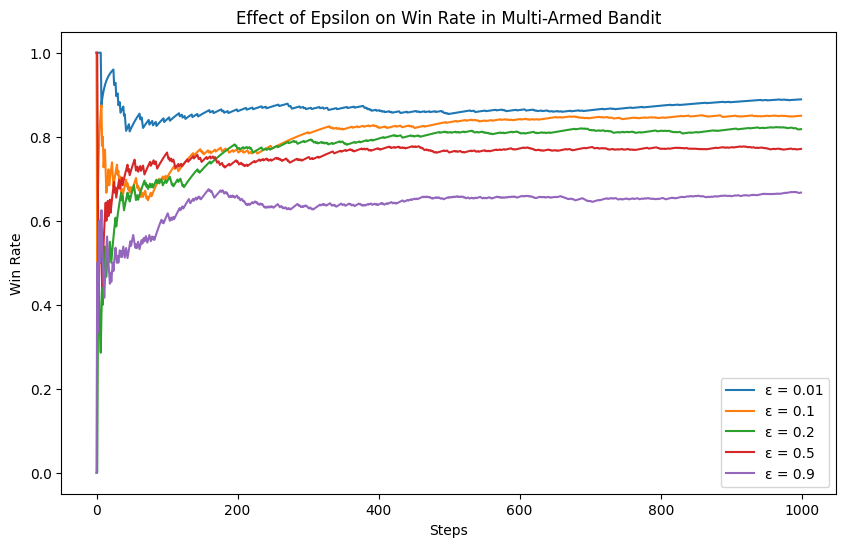

In [ ]:
plt.figure(figsize=(10, 6))
for epsilon in epsilons:
    bandit = MultiArmedBandit(k=10)
    win_rates = bandit.run(epsilon, steps)
    plt.plot(win_rates, label=f"ε = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Win Rate")
plt.title("Effect of Epsilon on Win Rate in Multi-Armed Bandit")
plt.legend()
plt.show()

In [ ]:
class Action:             #This class represents an action that can be taken in the bandit problem.
  def __init__(self, m):
    self.m = m            #Initializes an action with a given mean m, which represents the true mean reward of the action.
    self.mean = 0         #Represents the current estimate of the mean reward for the action.
    self.N = 0            #Represents the number of times this action has been chosen.
  def select(self):       #Chooses the action and returns a reward.
    return np.random.normal(0,1) + self.m   #It randomly samples from a normal distribution with mean self.m and standard deviation 1. This simulates the reward received when selecting the action.
  # Update the action-value estimate
  def update(self, x, alpha=0.1):   #Updates the action's estimate of the mean reward based on a new observation x; alpha is the learning rate(step size); avoiding excessive fluctuations while still allowing the agent to adjust to changing conditions.
    self.N += 1
    self.mean = self.mean + alpha*(x-self.mean) #simple incremental update rule that updates the mean reward estimate using a step size alpha which is 0.1.

**Update Method**
*   When an action is selected and its reward is observed (represented by x), the update method is called to update the action's estimate of the mean reward.
*   This method implements a simple incremental update formula for updating the mean reward estimate. The formula is derived from the sample mean update rule in statistics and is a form of incremental learning.
*   The formula updates the mean estimate (self.mean) by moving it slightly towards the observed reward x. The step size of the update is controlled by the alpha parameter, where smaller values of alpha result in slower adaptation to new observations.





**Two Arm Bandit**

This function takes four parameters:

m1: The mean reward of the first action (arm).

m2: The mean reward of the second action (arm).

eps: The probability of choosing a random action (exploration rate).

N: The total number of iterations (time steps) to run the bandit problem.

In [ ]:
def two_arm_bandit_epsilon_greedy(m1, m2, eps, N):
  import numpy as np # This import should be outside the function definition
  import matplotlib.pyplot as plt # This import should be outside the function definition

  class Action:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    def select(self):
        return np.random.normal(self.m, 1)

    def update(self, x, step_size):
        self.N += 1
        self.mean = self.mean + step_size*(x - self.mean)

  actions = [Action(m1), Action(m2)]                      #initializes two actions with means m1 and m2.
  data = np.empty(N)                                      #initializes an empty array data to store the rewards obtained in each iteration.
  explore,exploit=0,0                                     #counters explore and exploit to keep track of how many times the algorithm explores
                                                          # (chooses a random action) and exploits (chooses the action with the highest estimated reward), respectively.
  for i in range(N):
    p = np.random.random()                                #generates a random number p between 0 and 1.
    if p < eps:                                           #If p is less than eps, the algorithm chooses to explore by randomly selecting one of the actions.
      j = np.random.choice(2)                             #If p is greater than or equal to eps, the algorithm chooses to exploit by selecting the action with
                                                             #the highest estimated reward.
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])            #It selects the chosen action (j), selects a reward (x), and updates the action's estimate based
                                                            #on the observed reward using a fixed step size of 0.1.
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x                                            #It stores the observed reward x in the data array.
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)     #calculates the cumulative average reward obtained at each time step and plots it.
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")     #prints the final estimated mean rewards for each action.
  return cumulative_average                                         #returns the cumulative average rewards over time.

**Two Armed Bandit Problem**

*   The algorithm balances exploration and exploitation using the epsilon-greedy strategy. With probability eps, it explores by choosing a random action, and with probability 1-eps, it exploits by choosing the action with the highest estimated reward.
*   It maintains estimates of the mean rewards for each action and updates them incrementally based on observed rewards.
The algorithm's performance is evaluated by plotting the cumulative average reward over time and printing relevant statistics such as exploration and exploitation counts and final estimated mean rewards.



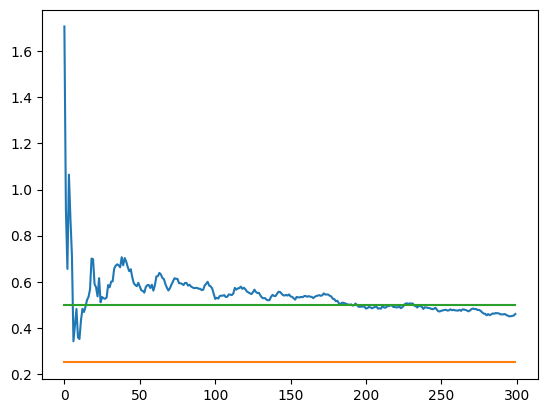

No of times explored:  29
No of times exploited:  271
Mean of rewards from arm 1: 0.06441548527609318
Mean of rewards from arm 2: 0.4918015901709646


In [ ]:
c1 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.1, 300)

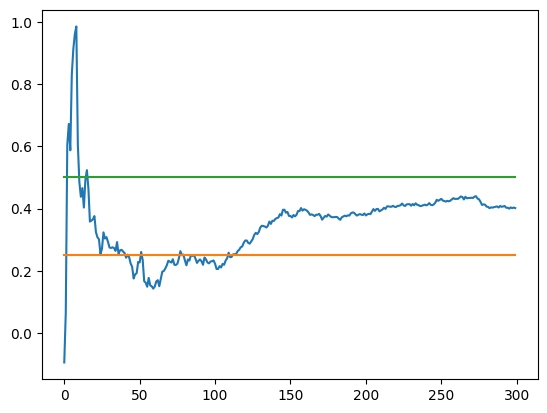

No of times explored:  16
No of times exploited:  284
Mean of rewards from arm 1: 0.2556201833321119
Mean of rewards from arm 2: -0.046078625620963765


In [ ]:
c2 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.05, 300)

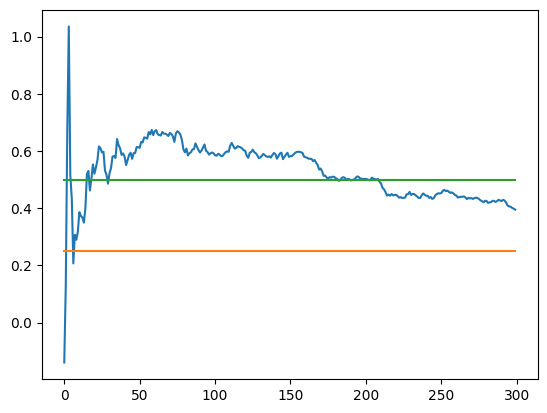

No of times explored:  4
No of times exploited:  296
Mean of rewards from arm 1: -0.20389709715465631
Mean of rewards from arm 2: -0.23418172668904305


In [ ]:
c3 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.01, 300)

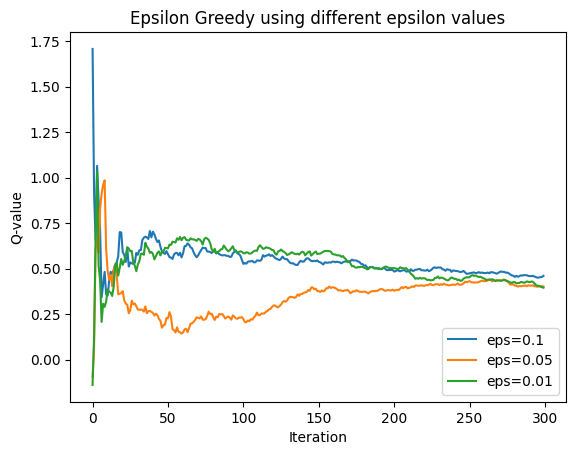

In [ ]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.01')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')
plt.show()

**Three Arm Bandit**

In [ ]:
def three_arm_bandit_epsilon_greedy(m1, m2, m3, eps, N):
  actions = [Action(m1), Action(m2), Action(m3)]
  data = np.empty(N)
  explore,exploit=0,0
  for i in range(N):
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")
  return cumulative_average

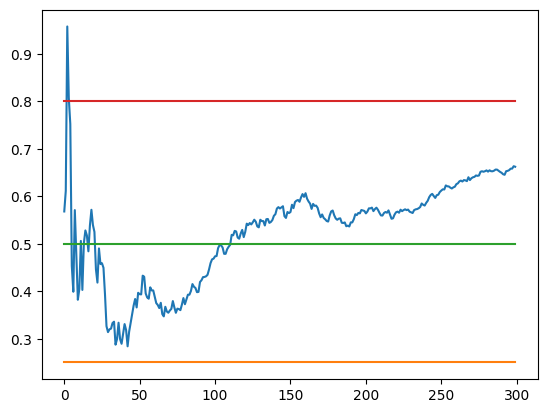

No of times explored:  33
No of times exploited:  267
Mean of rewards from arm 1: 0.47205524757446427
Mean of rewards from arm 2: 0.4637889753342609
Mean of rewards from arm 3: 0.9276046006819918


In [ ]:
c1 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.1, 300)

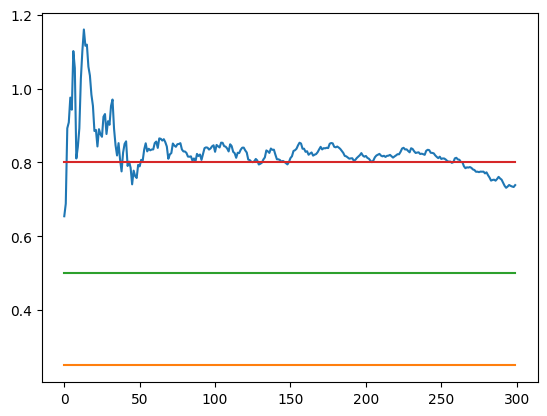

No of times explored:  14
No of times exploited:  286
Mean of rewards from arm 1: 0.5411677679072089
Mean of rewards from arm 2: -0.018452646074196055
Mean of rewards from arm 3: -0.008021507997101322


In [ ]:
c2 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.05, 300)

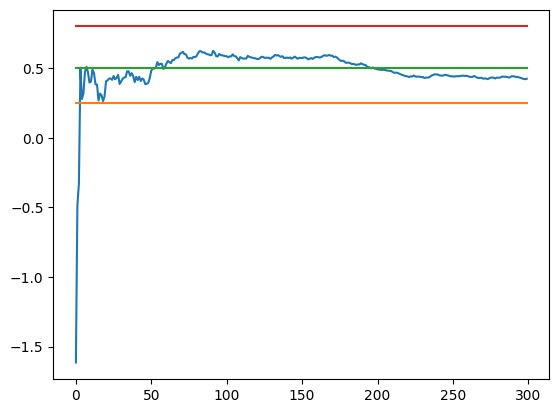

No of times explored:  2
No of times exploited:  298
Mean of rewards from arm 1: -0.10508961646871989
Mean of rewards from arm 2: 0.21067965641874478
Mean of rewards from arm 3: -0.11846451675837624


In [ ]:
c3 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.01, 300)

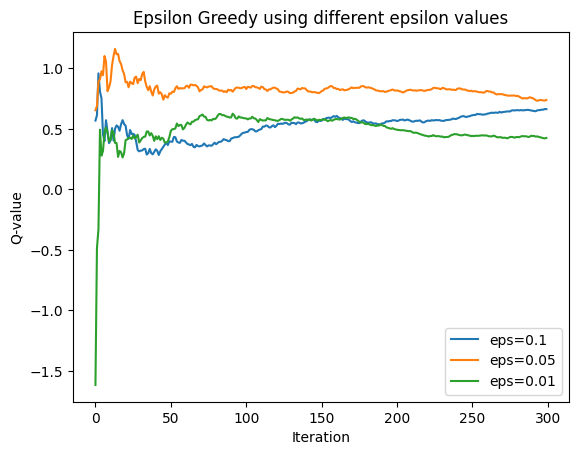

In [ ]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.01')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')
plt.show()

**N Arm Bandit**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, k):
        self.k = k
        self.true_win_rates = np.random.rand(k)
        self.estimated_win_rates = np.zeros(k)
        self.action_counts = np.zeros(k)

    def pull_arm(self, arm):
        """Simulates pulling an arm; returns 1 for a win and 0 for a loss."""
        return 1 if np.random.rand() < self.true_win_rates[arm] else 0

    def select_arm(self, epsilon):
        """Selects an arm using the epsilon-greedy strategy."""
        if np.random.rand() < epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.estimated_win_rates)

    def update_estimates(self, arm, reward):
        """Updates the estimated win rate of the selected arm."""
        self.action_counts[arm] += 1
        self.estimated_win_rates[arm] += (reward - self.estimated_win_rates[arm]) / self.action_counts[arm]

    def run(self, epsilon, steps):
        """Runs the bandit simulation for a given epsilon over a number of steps."""
        total_wins = 0
        win_rates = []
        for _ in range(steps):
            arm = self.select_arm(epsilon)
            reward = self.pull_arm(arm)
            self.update_estimates(arm, reward)
            total_wins += reward
            win_rates.append(total_wins / (_ + 1))
        return win_rates

Enter the number of arms: 10


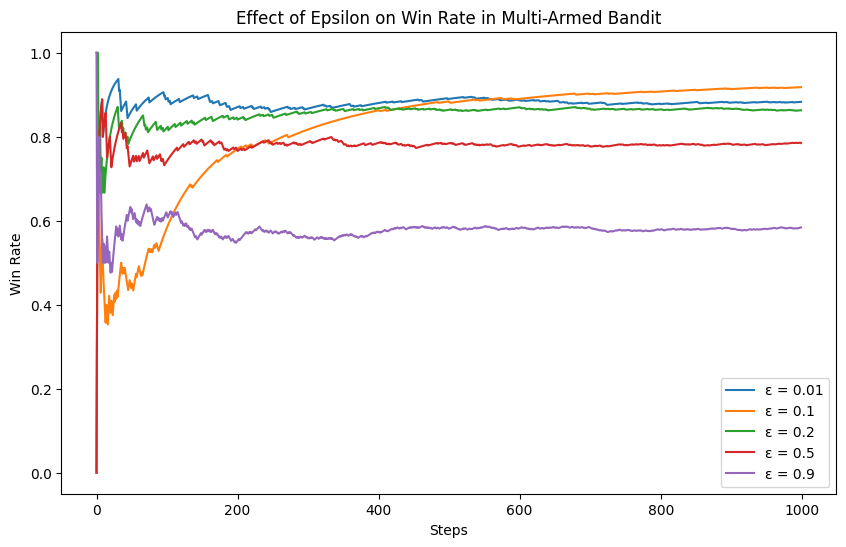

In [ ]:
n_arms = int(input("Enter the number of arms: "))
epsilons = [0.01, 0.1, 0.2, 0.5, 0.9]
steps = 1000
plt.figure(figsize=(10, 6))
for epsilon in epsilons:
    bandit = MultiArmedBandit(k=n_arms)
    win_rates = bandit.run(epsilon, steps)
    plt.plot(win_rates, label=f"ε = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Win Rate")
plt.title("Effect of Epsilon on Win Rate in Multi-Armed Bandit")
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Assuming 'win_rates' is the list of win rates obtained from the bandit.run() method.
#  You'll need to adapt this based on how you're actually getting the win rate data.

def estimate_final_win_rate(win_rates):
    # Estimate the final win rate by taking the average of the last 100 steps.
    # Adjust 100 based on the desired window size
    return np.mean(win_rates[-100:])


# Get user input for epsilon
epsilon = float(input("Enter epsilon value: "))

# Run the bandit simulation (replace with your actual simulation logic).
# This assumes your MultiArmedBandit class and run method are available.
n= int(input("Enter the number of arms: "))
m = int(input("Enter the number of steps: "))
bandit = MultiArmedBandit(k=n)  # or whatever number of arms
win_rates = bandit.run(epsilon, m)

# Estimate the win rate.
estimated_win_rate = estimate_final_win_rate(win_rates)
print("Estimated final win rate:", estimated_win_rate)

Enter epsilon value: 0.01
Enter the number of arms: 3
Enter the number of steps: 10000
Estimated final win rate: 0.7576133612710199


# Experiment 3

**UCB1 Bandit Algorithm**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class UCB1Bandit:
    def __init__(self, n_arms, c=0.5):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)  # Number of times each arm is pulled
        self.values = np.zeros(n_arms)  # Estimated rewards for each arm
        self.c = c  # Exploration-exploitation tradeoff parameter

    def select_arm(self, t):
        if t < self.n_arms:
            return t  # Play each arm once initially
        ucb_values = self.values + self.c * np.sqrt(np.log(t + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        self.values[arm] = ((n - 1) * self.values[arm] + reward) / n

In [ ]:
# Simulation parameters
n_arms = 5  # Number of bandit arms
T = 300  # Number of time steps
true_rewards = np.random.rand(n_arms)  # True reward probabilities of each arm

In [ ]:
# Initialize UCB1 Bandit
bandit = UCB1Bandit(n_arms)
total_reward = 0.00
ucb_values_over_time = []

In [ ]:
# Run the UCB1 algorithm
for t in range(T):
    chosen_arm = bandit.select_arm(t)
    reward = np.random.binomial(1, true_rewards[chosen_arm])  # Simulated reward (0 or 1)
    bandit.update(chosen_arm, reward)
    total_reward += reward
    ucb_values_over_time.append(bandit.values.copy())

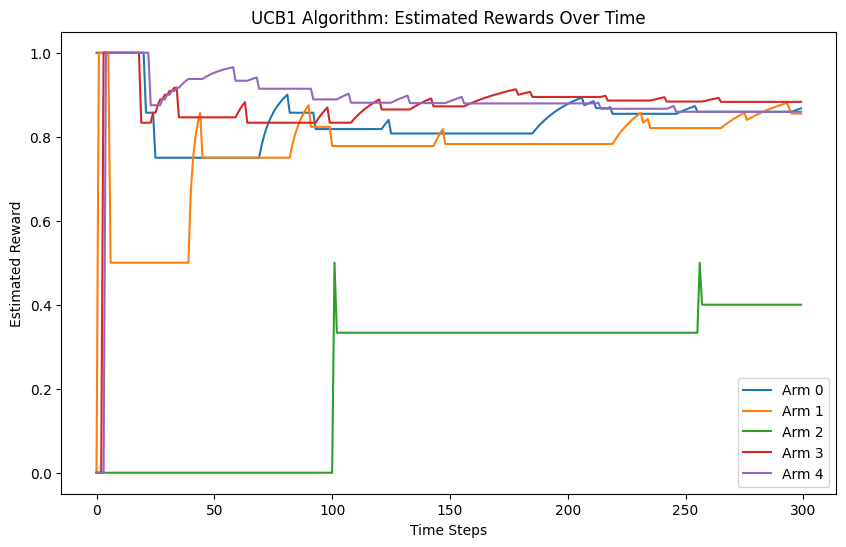

In [ ]:
# Plot UCB values over time
ucb_values_over_time = np.array(ucb_values_over_time)
plt.figure(figsize=(10, 6))
for arm in range(n_arms):
    plt.plot(ucb_values_over_time[:, arm], label=f'Arm {arm}')
plt.xlabel("Time Steps")
plt.ylabel("Estimated Reward")
plt.title("UCB1 Algorithm: Estimated Rewards Over Time")
plt.legend()
plt.show()

In [ ]:
print(f"Total Reward Collected: {total_reward}")

Total Reward Collected: 258.0


**Thompson Sampling Algorithm**

In [ ]:
import numpy as np
k=5
rounds = 1000

In [ ]:
class ThompsonSampling:
    def __init__(self, n_arms,epsilon):
        # Initialize each arm's Beta distribution with parameters (1, 1)
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.true_win_rates = np.random.rand(k)
        self.alpha = np.ones(n_arms)  # Prior successes
        self.beta = np.ones(n_arms)   # Prior failures
        self.estimated_rewards = [[] for _ in range(n_arms)]

    def select_arm(self):
        # For each arm, sample from its Beta distribution and choose the arm with the highest sample
        if np.random.rand() < self.epsilon:
            # Forced exploration: pick a random arm
            return np.random.randint(0, self.n_arms)
        else:
            # Thompson sampling
            samples = np.random.beta(self.alpha, self.beta)
            return np.argmax(samples)


    def update(self, chosen_arm, reward):
        # Update the Beta parameters based on the reward (1 for success, 0 for failure)
        if reward:
            self.alpha[chosen_arm] += 1
        else:
            self.beta[chosen_arm] += 1

    def run(self,steps):
      rewards = np.zeros(rounds)
      chosen_arms = np.zeros(rounds, dtype=int)
      for t in range(rounds):
        # Select an arm based on current beliefs
        arm = self.select_arm()
        # Simulate pulling the arm: reward is 1 with probability given by true_probabilities[arm]
        reward = 1 if np.random.rand() < self.true_win_rates[arm] else 0
        # Update our belief for the chosen arm
        self.update(arm, reward)
        rewards[t] = reward
        chosen_arms[t] = arm
        for arm_index in range(self.n_arms):
                current_est = self.alpha[arm_index] / (self.alpha[arm_index] + self.beta[arm_index])
                self.estimated_rewards[arm_index].append(current_est)
      return rewards, chosen_arms

In [ ]:
# Create an instance of the ThompsonSampling class
sampling = ThompsonSampling(n_arms=k, epsilon=0.1)  # Choose an appropriate epsilon value

In [ ]:
# Run the simulation
rewards, chosen_arms = sampling.run(steps=rounds)

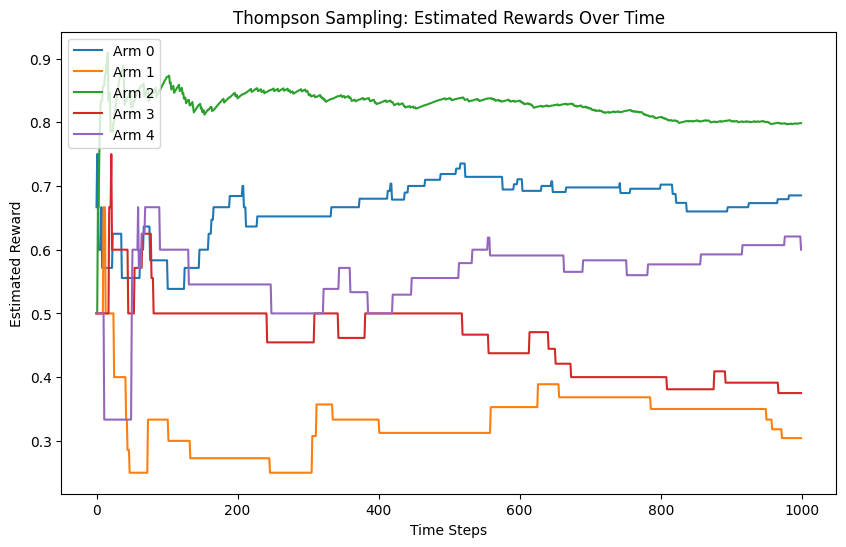

In [ ]:
# Now you can plot the estimated rewards
plt.figure(figsize=(10, 6))
for arm in range(k):
    plt.plot(sampling.estimated_rewards[arm], label=f"Arm {arm}")
plt.xlabel("Time Steps")
plt.ylabel("Estimated Reward")
plt.title("Thompson Sampling: Estimated Rewards Over Time")
plt.legend()
plt.show()

In [ ]:
print("Total reward:", rewards.sum())
print("Chosen arms distribution:", np.bincount(chosen_arms))

Total reward: 768.0
Chosen arms distribution: [ 52  21 877  22  28]


# Experiment 4



**RE**ward **I**ncrement = **N**onnegative **F**actor **O**ffset **R**einforcement **C**haracteristic **E**ligibility


In [ ]:
!pip install gym

In [ ]:
!pip install pygame --upgrade

In [ ]:
!pip install gym[classic_control] --no-deps

In [ ]:
import gym #Gymnasium interface is simple, pythonic, and capable of representing general RL problems
import numpy as np
from collections import deque #Doubly Ended Queue
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10) #customize the default parameters of matplotlib

In [ ]:
import torch
import torch.nn as nn                               #import torch
import torch.nn.functional as F                     #used to train and build the layers of neural networks such as input, hidden, and output
import torch.optim as optim                         #implementing various optimization algorithms
from torch.distributions import Categorical         #contains parameterizable probability distributions and sampling functions and construction of stochastic computation graphs
torch.manual_seed(0)                                #Sets the seed for generating random numbers

In [ ]:
import base64, io                                   #functions for encoding and decoding binary data

In [ ]:
# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob                                         #used to search for files that match a specific file pattern or name

In [ ]:
#torch.cuda.is_available() checks if CUDA-enabled GPU is available on your system.
#cuda:0 refers to the first GPU (index 0) available in your system. If you have multiple GPUs, you can specify a different index.
#cpu is used when no GPU is available, indicating that operations will be performed on the CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

env object can be used to interact with the environment

gym.make() is a method provided by the OpenAI Gym library that creates an instance of a particular environment.

CartPole-v0 specifies the environment to be created

seed(0) sets the random seed for the environment to 0. Setting the seed is important for reproducibility in reinforcement learning experiments. By setting the seed, you ensure that the sequence of random numbers generated by the environment (for things like initial state generation, action selection, etc.) remains the same across different runs of your program.

**Observation space of the environment:**
This prints information about the observation space of the environment. The observation space defines the possible states that the environment can be in, typically represented as a continuous or discrete space. For example, in the CartPole environment, the observation space might represent the position and velocity of the cart, as well as the angle and angular velocity of the pole.

**Action space of the environment**
This prints information about the action space of the environment. The action space defines the possible actions that the agent can take in the environment. It can also be continuous or discrete. For example, in the CartPole environment, the action space might consist of two discrete actions: move left or move right.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
env = gym.make('CartPole-v0')
env.seed(0)

[0]

In [ ]:
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
action space: Discrete(2)


Explaining the output:

**Observation Space:**

The observation space is described as a Box. This means it's a continuous space, defined by a lower bound and an upper bound for each dimension.
The lower bound for each dimension is [-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38].
The upper bound for each dimension is [4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38].
The space is 4-dimensional, as indicated by (4,).
The data type of the observations is float32.
So, in the context of CartPole, the observations likely represent the state of the environment. The four dimensions might correspond to the position of the cart, the velocity of the cart, the angle of the pole, and the angular velocity of the pole. The values in each dimension are within certain ranges, as specified by the bounds.

**Action Space:**

The action space is described as Discrete(2). This means it's a discrete space with 2 possible actions.
So, in the context of CartPole, the agent can take two discrete actions: 0 or 1, typically corresponding to pushing the cart left or right.

In CartPole, an agent might use the observation space to determine the current state of the environment, and then select actions from the action space to control the cart in a way that keeps the pole balanced.

The below class encapsulates a neural network-based policy, which can take states as input and produce actions along with their probabilities as output. This is commonly used in reinforcement learning algorithms such as Policy Gradient methods.

In [ ]:
#defines a class named Policy inherited from nn.Module, indicating that this class is a neural network model built using PyTorch's neural network module.
#It takes three parameters:
#state_size: The size of the state space. Default is 4.
#action_size: The size of the action space. Default is 2.
#hidden_size: The size of the hidden layer in the neural network. Default is 32.
#Inside the __init__ method:
#Two fully connected (linear) layers are defined:
#self.fc1: A linear layer mapping input of size state_size to hidden_size.
#self.fc2: A linear layer mapping the hidden layer to output of size action_size.
class Policy(nn.Module):
    def __init__(self, state_size=4, action_size=2, hidden_size=32):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)
#This method defines the forward pass of the neural network. Given an input state, it computes the output action probabilities.
#Inside the forward method:
#The input state is passed through the first linear layer (self.fc1) followed by a ReLU activation function.
#The result is then passed through the second linear layer (self.fc2) to produce the output.
#Finally, a softmax function is applied along dimension 1 to convert the raw scores into probabilities.
    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = self.fc2(x)
        # we just consider 1 dimensional probability of action
        return F.softmax(x, dim=1)
#This method is responsible for selecting an action based on the current state.
#Inside the act method:
#The input state is converted to a PyTorch tensor of type float, unsqueezed to add an extra dimension (to make it batched), and moved to the appropriate device (GPU or CPU).
#The forward pass of the network is then called with this processed state to obtain action probabilities.
#A Categorical distribution is created using these probabilities.
#An action is sampled from this distribution.
#The sampled action and the log probability of the action are returned.
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state).cpu()
        model = Categorical(probs)
        action = model.sample()
        return action.item(), model.log_prob(action)

The below code implements the REINFORCE algorithm (also known as the Policy Gradient method) for training a policy network to solve a reinforcement learning problem.

In [ ]:
#This function takes the following parameters:
#policy: The policy network to be trained.
#optimizer: The optimizer used to update the weights of the policy network.
#n_episodes: The maximum number of episodes to train the policy for. Default is 1000.
#max_t: The maximum number of time steps per episode. Default is 1000.
#gamma: The discount factor for future rewards. Default is 1.0 (no discounting).
#print_every: How often to print progress during training. Default is every 100 episodes.
def reinforce(policy, optimizer, n_episodes=1000, max_t=1000, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100) #scores_deque is used to calculate the running average of scores over the last 100 episodes.
    scores = []                      #keep track of the scores obtained in each episode
    for e in range(1, n_episodes):
        #saved_log_probs and rewards are initialized to store the log probabilities of actions and rewards obtained at each time step.
        saved_log_probs = []
        rewards = []
        #The environment is reset to obtain the initial state.
        state = env.reset()
        # Within each episode, a trajectory is collected for up to max_t time steps
        for t in range(max_t):
            # At each time step, an action is sampled from the policy network.
            #The log probability of the action is saved. The environment is then stepped forward, and the resulting reward and next state are recorded.
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break
        # Calculate total expected reward
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        # Recalculate the total reward applying discounted factor obtained in the trajectory.
        discounts = [gamma ** i for i in range(len(rewards) + 1)]
        R = sum([a * b for a,b in zip(discounts, rewards)])
        # Calculate the loss
        policy_loss = []
        for log_prob in saved_log_probs:
            # Note that we are using Gradient Ascent, not Descent. So we need to calculate it with negative rewards.
            policy_loss.append(-log_prob * R)
        # After that, we concatenate whole policy loss in 0th dimension
        policy_loss = torch.cat(policy_loss).sum()
        # Backpropagation
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()
        if e % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_deque)))
        if np.mean(scores_deque) >= 195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e - 100, np.mean(scores_deque)))
            break
    return scores

In [ ]:
policy = Policy().to(device)
optimizer = optim.Adam(policy.parameters(), lr=1e-2)
scores = reinforce(policy, optimizer, n_episodes=2000)

Episode 100	Average Score: 40.21
Episode 200	Average Score: 88.10
Episode 300	Average Score: 56.17
Episode 400	Average Score: 64.05
Episode 500	Average Score: 77.92
Episode 600	Average Score: 80.68
Episode 700	Average Score: 119.96
Environment solved in 694 episodes!	Average Score: 195.42


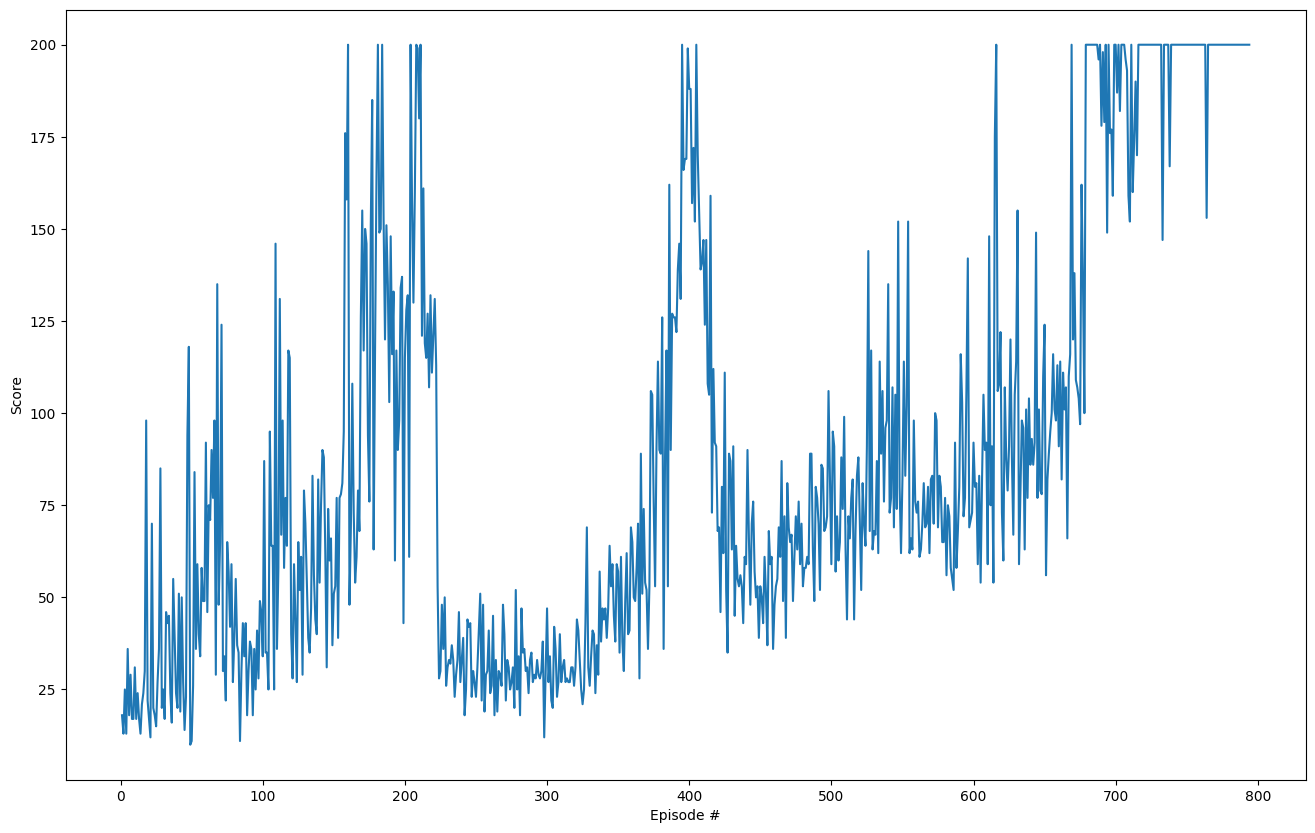

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
import gym
import glob
import base64
import io
import numpy as np
import IPython.display as display
from gym.wrappers.record_video import RecordVideo

In [ ]:
# Function to display the recorded video
def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]  # Pick the first video file
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(display.HTML(data=f'''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{encoded.decode('ascii')}" type="video/mp4" />
             </video>'''))
    else:
        print("Could not find video")

In [ ]:
# Function to record and save the video of the trained model
def show_video_of_model(policy, env_name):
    env = gym.make(env_name, render_mode="rgb_array")  # Ensure correct rendering
    env = RecordVideo(env, "video", episode_trigger=lambda e: True)  # Save all episodes
    reset_output = env.reset()
    state = reset_output[0] if isinstance(reset_output, tuple) else reset_output  # Handle Gym versions
    done = False
    for _ in range(1000):
        env.render()
        action, _ = policy.act(state)
        step_output = env.step(action)
        next_state = step_output[0]  # Handle different Gym versions
        state = np.array(next_state)  # Ensure state is an array

        if step_output[2]:  # done flag (index 2)
            break
    env.close()

In [ ]:
show_video_of_model(policy, "CartPole-v0")  # Change env_name if needed

In [ ]:
show_video('CartPole-v0')

**Compare results for different gamma values**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
gamma_values = [0, 0.1, 0.5, 0.9, 1.0]  # Different gamma values
num_episodes = 2000
all_scores = {}  # Store scores for each gamma

In [ ]:
# Function to train and store scores for different gamma values
for gamma in gamma_values:
    policy = Policy().to(device)  # Reset policy for fair comparison
    optimizer = optim.Adam(policy.parameters(), lr=1e-2)
    print(f"Training with gamma = {gamma}...")
    scores = reinforce(policy, optimizer, n_episodes=num_episodes, gamma=gamma)  # Pass gamma
    all_scores[gamma] = scores  # Store results

Training with gamma = 0...
Episode 100	Average Score: 14.23
Episode 200	Average Score: 10.46
Episode 300	Average Score: 9.89
Episode 400	Average Score: 10.83
Episode 500	Average Score: 15.30
Episode 600	Average Score: 14.14
Episode 700	Average Score: 10.04
Episode 800	Average Score: 9.76
Episode 900	Average Score: 9.55
Episode 1000	Average Score: 9.32
Episode 1100	Average Score: 9.38
Episode 1200	Average Score: 9.25
Episode 1300	Average Score: 9.35
Episode 1400	Average Score: 9.39
Episode 1500	Average Score: 9.22
Episode 1600	Average Score: 9.35
Episode 1700	Average Score: 9.26
Episode 1800	Average Score: 9.43
Episode 1900	Average Score: 9.32
Training with gamma = 0.1...
Episode 100	Average Score: 10.74
Episode 200	Average Score: 9.46
Episode 300	Average Score: 9.66
Episode 400	Average Score: 10.21
Episode 500	Average Score: 9.40
Episode 600	Average Score: 9.40
Episode 700	Average Score: 9.39
Episode 800	Average Score: 9.41
Episode 900	Average Score: 9.38
Episode 1000	Average Score: 9.

Exception ignored in: <function VideoRecorder.__del__ at 0x7cbb1b22a7a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gym/wrappers/monitoring/video_recorder.py", line 269, in __del__
    self.close()
  File "/usr/local/lib/python3.11/dist-packages/gym/wrappers/monitoring/video_recorder.py", line 228, in close
    if self.encoder:
       ^^^^^^^^^^^^
AttributeError: 'VideoRecorder' object has no attribute 'encoder'


Episode 300	Average Score: 51.87
Episode 400	Average Score: 114.62
Episode 500	Average Score: 98.49
Episode 600	Average Score: 94.09
Episode 700	Average Score: 81.28
Episode 800	Average Score: 77.55
Episode 900	Average Score: 62.89
Episode 1000	Average Score: 92.84
Episode 1100	Average Score: 122.03
Episode 1200	Average Score: 126.57
Episode 1300	Average Score: 73.04
Episode 1400	Average Score: 81.12
Episode 1500	Average Score: 98.86
Episode 1600	Average Score: 111.24
Episode 1700	Average Score: 166.70
Environment solved in 1668 episodes!	Average Score: 195.31


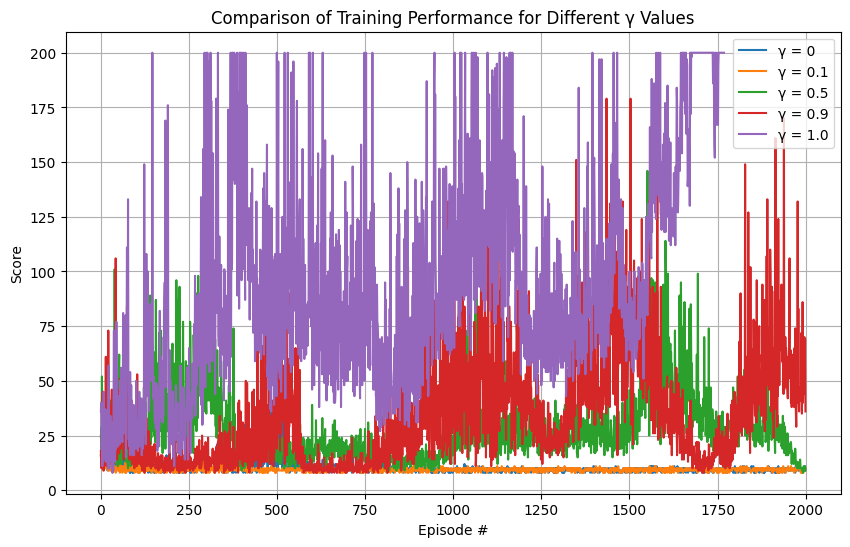

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
for gamma, scores in all_scores.items():
    plt.plot(np.arange(1, len(scores)+1), scores, label=f'γ = {gamma}')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Comparison of Training Performance for Different γ Values')
plt.legend()
plt.grid()
plt.show()

**Acrobot**

In [ ]:
!pip install gym
!pip install gymnasium
!pip install pygame --upgrade
!pip install gym[classic_control] --no-deps

In [ ]:
import gymnasium as gym #using gymnasium instead of gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from torch import autograd
from gymnasium.wrappers import RecordVideo #importing record video explicitly
from collections import deque
torch.manual_seed(0)

In [ ]:
class Policy(nn.Module):
    def __init__(self,input_shape,action_shape):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_shape[0],64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,action_shape),
            nn.Softmax(dim = 1)
        )
    def forward(self,x):
        return self.model(x)

In [ ]:
def action(model, s):
    # simple pytorch aproach for action-selection and log-prob calc
    #https://pytorch.org/docs/stable/distributions.html
    prob = model(s)
    m = Categorical(prob)
    a = m.sample()
    # log p(a∣π(s))
    log_p = m.log_prob(a)
    #print(a.item(), log_p)
    return a.item(), log_p

In [ ]:
def policy_optimization(ep, model, optimizer,batch_rewards,log_probs):
    R = 0
    gamma = 0.99
    policy_loss = []
    rewards = []
    #calc discounted Rewards
    for r in batch_rewards[::-1]: # reverses the list of rewards
        R = r + gamma * R
        rewards.insert(0, R) # inserts the current rewart to first position
    rewards = torch.tensor(rewards)
    # standardization to get data of zero mean and varianz 1, stabilizes learning
    #-- attention scaling rewards looses information of special events with higher rewards - addapting on different environments
    rewards = (rewards - rewards.mean()) / (rewards.std() + ep)
    for log_prob, reward in zip(log_probs, rewards):
        policy_loss.append(-log_prob * reward) #baseline+
    optimizer.zero_grad()
    policy_loss = torch.cat(policy_loss).sum()
    policy_loss.backward()
    optimizer.step()

In [ ]:
def run(episodes,model,env):
    optimizer = optim.Adam(model.parameters(), lr = 1e-2)
    rewards = []
    steps_taken = []
    for i in range(episodes):
        done = False
        ep_rewards = 0
        batch_rewards = []
        log_probs = []
        state,_ = env.reset() #uncomment when using gym
        #state = env.reset() #comment when using gym
        steps = 0
        while not done:
            a, log_p = action(model, torch.Tensor(state).unsqueeze(0))
            log_probs.append(log_p)
            new_state, reward, terminated, truncated, info = env.step(a) #added truncated
            done = terminated or truncated # added
            batch_rewards.append(reward)
            ep_rewards += reward
            steps +=1
            state = new_state
        rewards.append(ep_rewards)
        steps_taken.append(steps)
        print("Episode: {} --- Rewards: {} --- Steps: {}".format(i, ep_rewards, steps))
        policy_optimization(i, model, optimizer, batch_rewards,log_probs)
    return steps_taken

In [ ]:
def main():
    USE_CUDA = torch.cuda.is_available()
    Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)
    env = gym.make("Acrobot-v1", render_mode="rgb_array") #adding render mode
    env = RecordVideo(env, "Saved_Videos/", episode_trigger=lambda episode_id: episode_id%60==0) #using RecordVideo instead of Monitor
    obs_shape = env.observation_space.shape
    action_shape = env.action_space.n
    episodes = 300
    model = Policy(obs_shape, action_shape)
    steps = run(episodes, model, env)
    env.close()
    plt.plot(steps)
    plt.xlabel("Episodes")
    plt.ylabel("Steps needed to reach goal")
    plt.show()

Episode: 0 --- Rewards: -500.0 --- Steps: 500
Episode: 1 --- Rewards: -500.0 --- Steps: 500
Episode: 2 --- Rewards: -500.0 --- Steps: 500
Episode: 3 --- Rewards: -500.0 --- Steps: 500
Episode: 4 --- Rewards: -500.0 --- Steps: 500
Episode: 5 --- Rewards: -500.0 --- Steps: 500
Episode: 6 --- Rewards: -500.0 --- Steps: 500
Episode: 7 --- Rewards: -500.0 --- Steps: 500
Episode: 8 --- Rewards: -500.0 --- Steps: 500
Episode: 9 --- Rewards: -500.0 --- Steps: 500
Episode: 10 --- Rewards: -500.0 --- Steps: 500
Episode: 11 --- Rewards: -500.0 --- Steps: 500
Episode: 12 --- Rewards: -500.0 --- Steps: 500
Episode: 13 --- Rewards: -500.0 --- Steps: 500
Episode: 14 --- Rewards: -500.0 --- Steps: 500
Episode: 15 --- Rewards: -500.0 --- Steps: 500
Episode: 16 --- Rewards: -500.0 --- Steps: 500
Episode: 17 --- Rewards: -500.0 --- Steps: 500
Episode: 18 --- Rewards: -500.0 --- Steps: 500
Episode: 19 --- Rewards: -500.0 --- Steps: 500
Episode: 20 --- Rewards: -500.0 --- Steps: 500
Episode: 21 --- Rewards

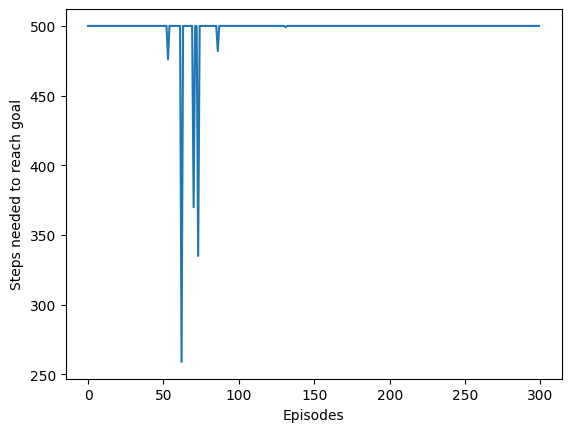

In [ ]:
import warnings
warnings.filterwarnings('ignore')
if __name__ == "__main__":
    main()

In [ ]:
import moviepy.editor as mpe
from IPython.display import Video

In [ ]:
# List of video files to merge
video_files = [
    "/content/Saved_Videos/rl-video-episode-0.mp4",
    "/content/Saved_Videos/rl-video-episode-60.mp4",
    "/content/Saved_Videos/rl-video-episode-120.mp4",
    "/content/Saved_Videos/rl-video-episode-180.mp4",
    "/content/Saved_Videos/rl-video-episode-240.mp4"
]

In [ ]:
# Create a list of video clips
video_clips = [mpe.VideoFileClip(file) for file in video_files]
# Concatenate the video clips
final_clip = mpe.concatenate_videoclips(video_clips)
# Write the merged video to a file
final_clip.write_videofile("merged_video.mp4")

Moviepy - Building video merged_video.mp4.
Moviepy - Writing video merged_video.mp4



Moviepy - Done !
Moviepy - video ready merged_video.mp4


In [ ]:
# Display the merged video
Video("merged_video.mp4", embed=True)

# Experiment 5.1

In [ ]:
import numpy as np

In [ ]:
class GridWorld:
    def __init__(self):
        self.grid_size = 3
        self.num_states = self.grid_size * self.grid_size
        self.num_actions = 4
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        self.gamma = 0.9
        self.grid_rewards = np.zeros((self.grid_size, self.grid_size))
        self.grid_rewards[self.grid_size - 1, self.grid_size - 1] = 1  #goal reward
        self.transition_prob = self._build_transition_prob()
    def _build_transition_prob(self):
        transition_prob = np.zeros((self.num_states, self.num_actions, self.num_states))
        for s in range(self.num_states):
            for a in range(self.num_actions):
                next_states = self._get_next_states(s, a)
                for next_state, prob in next_states.items():
                    transition_prob[s, a, next_state] = prob
        return transition_prob
    def _get_next_states(self, state, action):
        i, j = state // self.grid_size, state % self.grid_size
        next_states = {}
        if action == 0:
            next_i = max(i - 1, 0)
            next_states[next_i * self.grid_size + j] = 1
        elif action == 1:
            next_i = min(i + 1, self.grid_size - 1)
            next_states[next_i * self.grid_size + j] = 1
        elif action == 2:
            next_j = max(j - 1, 0)
            next_states[i * self.grid_size + next_j] = 1
        elif action == 3:
            next_j = min(j + 1, self.grid_size - 1)
            next_states[i * self.grid_size + next_j] = 1
        return next_states
    def iterative_policy_eval(self, policy, theta=0.0001, max_iterations=1000):
        V = np.zeros(self.num_states)
        for _ in range(max_iterations):
            delta = 0
            for s in range(self.num_states):
                v = V[s]
                if s == (self.num_states - 1):
                    V[s] = self.grid_rewards[s // self.grid_size, s % self.grid_size]
                else:
                    a = policy[s]
                    V[s] = sum([self.transition_prob[s, a, s1] *
                                (self.grid_rewards[s1 // self.grid_size, s1 % self.grid_size] +
                                 self.gamma * V[s1]) for s1 in range(self.num_states)])
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break
        return V
    def policy_itr(self, max_iterations=100):
        policy = np.random.randint(0, self.num_actions, self.num_states)
        for _ in range(max_iterations):
            V = self.iterative_policy_eval(policy)
            policy_stable = True
            for s in range(self.num_states):
                old_action = policy[s]
                policy[s] = np.argmax([sum([self.transition_prob[s, a, s1] *
                                             (self.grid_rewards[s1 // self.grid_size, s1 % self.grid_size] +
                                              self.gamma * V[s1]) for s1 in range(self.num_states)]) for a in range(self.num_actions)])
                if old_action != policy[s]:
                    policy_stable = False
            if policy_stable:
                break
        return policy
    def value_itr(self, theta=0.0001, max_iterations=1000):
        V = np.zeros(self.num_states)
        for _ in range(max_iterations):
            delta = 0
            for s in range(self.num_states):
                v = V[s]
                if s == (self.num_states - 1):
                    V[s] = self.grid_rewards[s // self.grid_size, s % self.grid_size]
                else:
                    V[s] = max([sum([self.transition_prob[s, a, s1] *
                                     (self.grid_rewards[s1 // self.grid_size, s1 % self.grid_size] +
                                      self.gamma * V[s1]) for s1 in range(self.num_states)]) for a in range(self.num_actions)])
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break
        policy = np.zeros(self.num_states, dtype=int)
        for s in range(self.num_states):
            policy[s] = np.argmax([sum([self.transition_prob[s, a, s1] *
                                         (self.grid_rewards[s1 // self.grid_size, s1 % self.grid_size] +
                                          self.gamma * V[s1]) for s1 in range(self.num_states)]) for a in range(self.num_actions)])
        return policy

In [ ]:
if __name__ == "__main__":
    grid_world = GridWorld()

    policy = np.random.randint(0, grid_world.num_actions, grid_world.num_states)
    V = grid_world.iterative_policy_eval(policy)
    print("Iterative Policy Evaluation:")
    print(V.reshape(grid_world.grid_size, grid_world.grid_size))

    policy = grid_world.policy_itr()
    print("\nPolicy Iteration:")
    print(policy.reshape(grid_world.grid_size, grid_world.grid_size))

    policy = grid_world.value_itr()
    print("\nValue Iteration:")
    print(policy.reshape(grid_world.grid_size, grid_world.grid_size))

Iterative Policy Evaluation:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]

Policy Iteration:
[[1 1 1]
 [1 1 1]
 [3 3 1]]

Value Iteration:
[[1 1 1]
 [1 1 1]
 [3 3 1]]


# Experiment 5.2

In [ ]:
import numpy as np

In [ ]:
class GridWorld:
    def __init__(self, size=10):
        self.size = size
        self.num_states = size * size
        self.num_actions = 4  # Up, Down, Left, Right
        self.actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Corresponding state changes
        self.gamma = 0.9
        self.obstacles = self._generate_obstacles()
        self.rewards = self._generate_rewards()

    def _generate_obstacles(self):
        obstacles = set()
        num_obstacles = int(0.2 * self.num_states)  # 20% obstacles
        while len(obstacles) < num_obstacles:
            obstacles.add(np.random.randint(1, self.num_states - 1)) # Avoiding start and end
        return obstacles

    def _generate_rewards(self):
        rewards = np.full(self.num_states, 1)  # default reward for every state
        rewards[list(self.obstacles)] = -1  # -1 for obstacle states
        rewards[0] = 0  # 0 reward for terminal state (start)
        rewards[self.num_states - 1] = 0  # 0 reward for terminal state (end)
        return rewards

    def get_next_state(self, current_state, action):
        current_row, current_col = divmod(current_state, self.size)
        next_row, next_col = current_row + self.actions[action][0], current_col + self.actions[action][1]

        if 0 <= next_row < self.size and 0 <= next_col < self.size and (next_row * self.size + next_col) not in self.obstacles:
            next_state = next_row * self.size + next_col
        else:  # If it hits a boundary or obstacle, stay in the current state
            next_state = current_state
        return next_state

    def iterative_policy_evaluation(self, policy, theta=0.0001, max_iterations=1000):
      V = np.zeros(self.num_states)

      # Fix the terminal states' value to 0
      terminal_states = [0, self.num_states - 1]  # start and end state
      V[terminal_states] = 0

      for _ in range(max_iterations):
        delta = 0
        for s in range(self.num_states):
            if s in terminal_states:  # Skip terminal states
                continue

            v = V[s]
            next_s = self.get_next_state(s, policy[s])
            V[s] = self.rewards[s] + self.gamma * V[next_s]
            V[s] = round(V[s], 2)  # Round the value to 2 decimal places
            delta = max(delta, abs(v - V[s]))

        if delta < theta:
            break

      return V



    def policy_iteration(self, theta=0.0001, max_iterations=1000):
        policy = np.random.randint(0, self.num_actions, self.num_states)
        V = np.zeros(self.num_states)

        for _ in range(max_iterations):
            V = self.iterative_policy_evaluation(policy, theta)
            policy_stable = True
            for s in range(self.num_states):
                old_action = policy[s]
                action_values = [self.rewards[self.get_next_state(s, a)] + self.gamma * V[self.get_next_state(s, a)] for a in range(self.num_actions)]
                policy[s] = np.argmax(action_values)
                if old_action != policy[s]:
                    policy_stable = False
            if policy_stable:
                break
        return policy, V

    def value_iteration(self, theta=0.0001, max_iterations=1000):
        V = np.zeros(self.num_states)
        for _ in range(max_iterations):
            delta = 0
            for s in range(self.num_states):
                v = V[s]
                action_values = [self.rewards[self.get_next_state(s, a)] + self.gamma * V[self.get_next_state(s, a)] for a in range(self.num_actions)]
                V[s] = max(action_values)
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break
        policy = np.zeros(self.num_states, dtype=int)
        for s in range(self.num_states):
            action_values = [self.rewards[self.get_next_state(s, a)] + self.gamma * V[self.get_next_state(s, a)] for a in range(self.num_actions)]
            policy[s] = np.argmax(action_values)
        return policy, V

In [ ]:
# Example usage
grid_world = GridWorld()

In [ ]:
# Show obstacles for better understanding
print("Obstacles:")
obstacles_array = np.zeros((grid_world.size, grid_world.size))
for obstacle in grid_world.obstacles:
    row, col = divmod(obstacle, grid_world.size)
    obstacles_array[row, col] = 1  # Mark obstacle locations with 1
print(obstacles_array)

Obstacles:
[[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]]


In [ ]:
# Iterative policy evaluation
random_policy = np.random.randint(0, 4, grid_world.num_states)
V = grid_world.iterative_policy_evaluation(random_policy)
print("Iterative Policy Evaluation (V):")
print(V.reshape(grid_world.size, grid_world.size))

Iterative Policy Evaluation (V):
[[ 0.    7.96  9.96  7.96  7.96  9.96  9.96  9.96  9.96  9.96]
 [ 9.96  9.96  9.96  9.96  9.96  9.96  9.96  9.96  9.96  9.96]
 [-9.96  7.96  9.96  9.96  9.96  7.96  9.96  7.96  9.96  7.96]
 [ 9.96  9.96  9.96  7.96  9.96  9.96  9.96  9.96  9.96  9.96]
 [ 9.96  7.96  9.96  9.96  9.96  7.96  9.96  9.96 -9.96  9.96]
 [ 9.96  9.96  9.96  7.96  9.96  9.96  9.96  9.96  7.96  9.96]
 [ 9.96  9.96  9.96  9.96  9.96  9.96  9.96  9.96  7.96  9.96]
 [ 9.96  9.96  9.96  9.96  9.96  9.96  9.96  9.96  7.96  9.96]
 [ 9.96  9.96  9.96  9.96  7.96  9.96  9.96  9.96  9.96  9.96]
 [ 9.96  9.96  9.96  9.96 -9.96 -9.96  9.96  7.96  9.96  0.  ]]


In [ ]:
policy_pi, v_pi = grid_world.policy_iteration()
policy_vi, v_vi = grid_world.value_iteration()

In [ ]:
print("\nPolicy Iteration Policy:")
print(policy_pi.reshape(grid_world.size, grid_world.size))


Policy Iteration Policy:
[[1 1 0 1 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]]


In [ ]:
print("\nValue Iteration Policy:")
print(policy_vi.reshape(grid_world.size, grid_world.size))


Value Iteration Policy:
[[1 1 1 1 1 1 1 1 1 1]
 [3 3 1 1 1 3 1 3 1 1]
 [1 1 1 3 1 1 1 1 1 1]
 [1 3 1 1 1 3 1 1 3 1]
 [1 1 1 3 1 1 1 1 3 1]
 [1 1 1 1 1 1 1 1 3 1]
 [1 1 1 1 1 1 1 1 3 1]
 [1 1 1 1 3 1 1 1 1 1]
 [1 1 1 1 3 3 1 3 1 3]
 [3 3 3 1 2 3 1 3 1 0]]


# Experiment 6.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def gambler_value_iteration(p_h, goal=100, theta=1e-9, gamma=1.0):
    """
    Perform Value Iteration for the Gambler's Problem.

    Parameters:
        p_h (float): Probability of the coin landing heads.
        goal (int): Goal capital.
        theta (float): Convergence threshold.
        gamma (float): Discount factor (1.0 for undiscounted tasks).

    Returns:
        V (np.array): Final value function.
        policy (np.array): Optimal policy (stakes) for each capital.
    """
    V = np.zeros(goal + 1)
    V[goal] = 1  # Terminal state with reward +1

    while True:
        delta = 0
        for s in range(1, goal):
            actions = range(1, min(s, goal - s) + 1)
            action_returns = []
            for a in actions:
                win = s + a
                lose = s - a
                reward = 1 if win == goal else 0
                value = p_h * (reward + gamma * V[win]) + (1 - p_h) * (gamma * V[lose])
                action_returns.append(value)
            max_value = max(action_returns)
            delta = max(delta, abs(V[s] - max_value))
            V[s] = max_value
        if delta < theta:
            break

    # Derive optimal policy
    policy = np.zeros(goal + 1)
    for s in range(1, goal):
        actions = range(1, min(s, goal - s) + 1)
        action_returns = []
        for a in actions:
            win = s + a
            lose = s - a
            reward = 1 if win == goal else 0
            value = p_h * (reward + gamma * V[win]) + (1 - p_h) * (gamma * V[lose])
            action_returns.append(value)
        best_action = actions[np.argmax(action_returns)]
        policy[s] = best_action

    return V, policy

In [ ]:
# Function to plot value function and policy
def plot_results(V, policy, p_h):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(V)
    plt.title(f'State-Value Function V(s) for p_h = {p_h}')
    plt.xlabel('Capital')
    plt.ylabel('Value Estimate')

    plt.subplot(1, 2, 2)
    plt.bar(range(len(policy)), policy)
    plt.title(f'Final Policy π(s) for p_h = {p_h}')
    plt.xlabel('Capital')
    plt.ylabel('Stake')

    plt.tight_layout()
    plt.show()

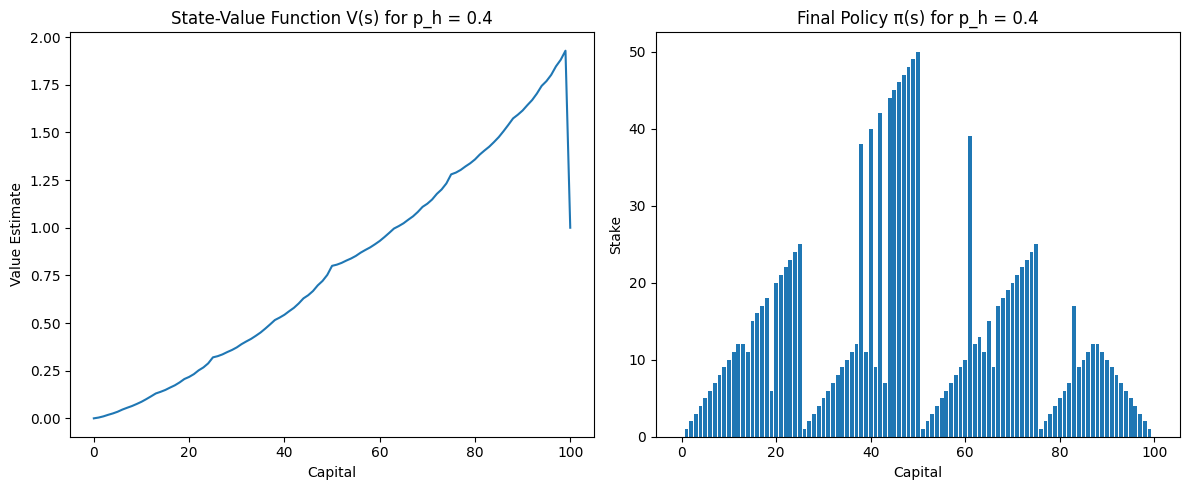

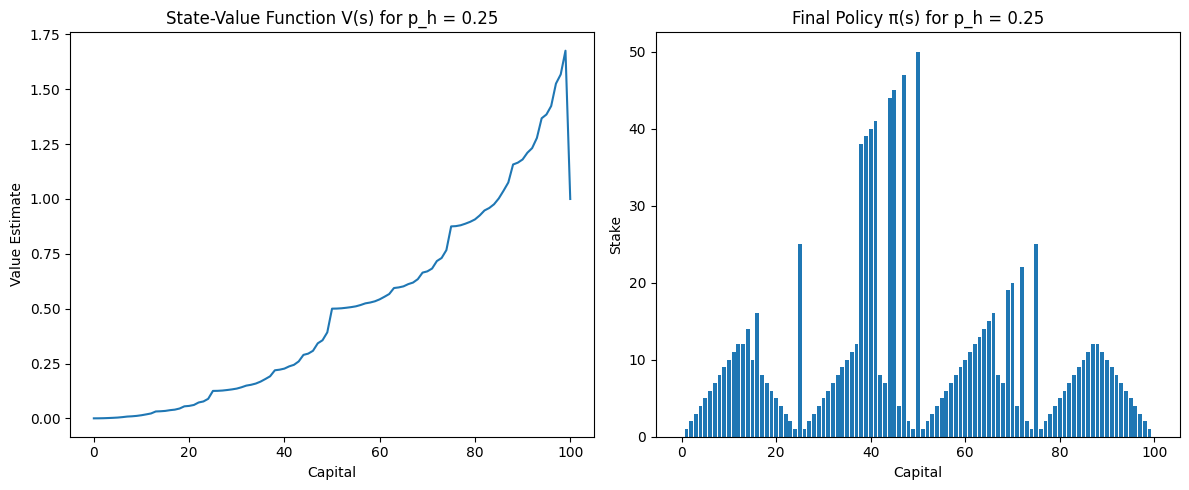

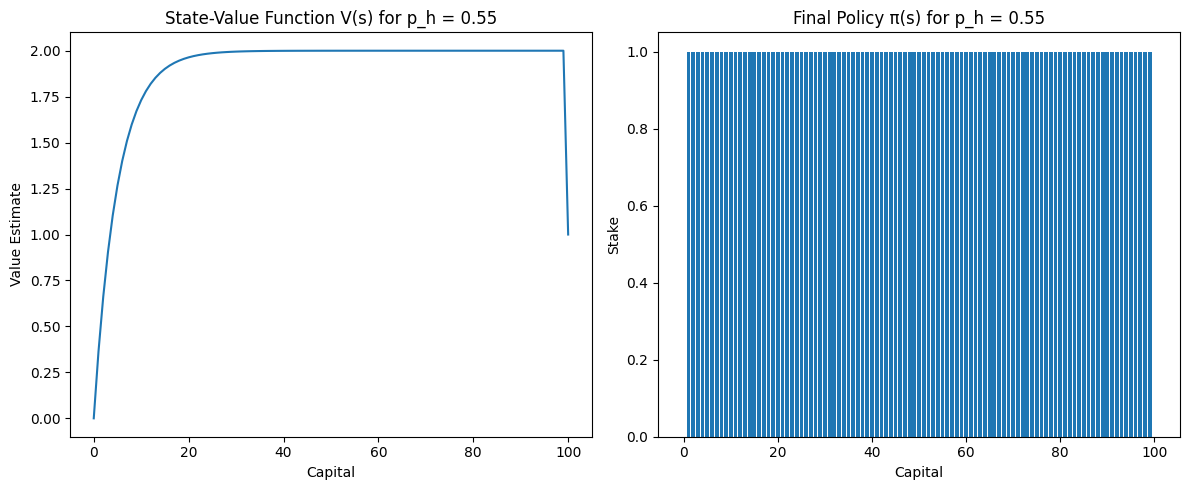

In [ ]:
# Run for the required probabilities
for prob in [0.4, 0.25, 0.55]:
    V, policy = gambler_value_iteration(p_h=prob)
    plot_results(V, policy, prob)

# Experiment 7.1

**SOLVING BLACKJACK PROBLEM USING FIRST-VISIT MONTE CARLO**

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 7)

In [ ]:
import itertools
from typing import *

In [ ]:
def toHit(state):
    total, *_ = state
    if total < 20:
        return True
    return False

In [ ]:
class BlackJack:
    def __init__(self, defaultPolicy):
        self.pi = defaultPolicy

        self.current_sum = range(12, 22)
        self.showing_card = range(1, 11)
        self.usable_ace = [True, False]
        self.values = dict()
        self.states = list(itertools.product(self.current_sum, self.showing_card, self.usable_ace))


    def initialise(self, pair):
        current_sum = pair.sum()
        usable_ace = False

        if (pair == 1).any():
            current_sum += 10
            usable_ace = True

        while current_sum < 11:
            deal = np.random.choice(self.cards)
            current_sum += deal
            # WITH USABLE ACE, SCORE += 11
            # WITHOUT, SCORE += 1
            if deal == 1:
                current_sum += 10
                usable_ace = True

        if current_sum == 11:
            current_sum += np.random.choice(self.cards)

        return current_sum, usable_ace

    def hit(self, current_sum, usable_ace):
        current_sum += np.random.choice(self.cards)

        if current_sum > 21 and usable_ace:
            current_sum -= 10
            usable_ace = False

        return current_sum, usable_ace

    def play(self):
        # STATES -> (P_TOTAL, DEAL_UP, USABLE_ACE)
        states = []
        actions = []
        rewards = []

        self.cards = np.minimum(np.arange(1, 14), 10)
        '''
        INITIAL CONDITION:
        - PLAYER -> 2 CARDS (BOTH UP)
        - DEALER -> 2 CARDS (1 UP AND OTHER DOWN)
        '''
        self.D_up, self.D_down = self.cards_D = np.random.choice(self.cards, size=2)
        self.cards_P = np.random.choice(self.cards, size=2)

        if set(self.cards_P) == {1, 10}:
            states.append((21, self.D_up, True)) # NATURAL WIN
            actions.append('stick')
            if set(self.cards_D) == {1, 10}:
                rewards.append(0)
            else:
                rewards.append(1)

            return states, actions, rewards

        current_sum_P, usable_ace_P = self.initialise(self.cards_P)
        states.append((current_sum_P, self.D_up, usable_ace_P))

        while True:
            current_sum_P, _, usable_ace_P = state = states[-1]

            if self.pi(state):
                actions.append('HIT')
                current_sum_P, usable_ace_P = self.hit(current_sum_P, usable_ace_P)

                if current_sum_P > 21:
                    rewards.append(-1)
                    break
                # ITS PLAYER'S TURN AGAIN
                else:
                    rewards.append(0)
                    states.append((current_sum_P, self.D_up, usable_ace_P))

            else:
                actions.append('STICK')
                # NOW, IT WILL BE DEALER'S TURN
                current_sum_D, usable_ace_D = self.initialise(self.cards_D)

                while current_sum_D < 17:
                    current_sum_D, usable_ace_D = self.hit(current_sum_D, usable_ace_D)

                if current_sum_D > 21:
                    rewards.append(1)

                elif current_sum_D > current_sum_P:
                    rewards.append(-1)

                elif current_sum_D == current_sum_P:
                    rewards.append(0)

                else:
                    assert current_sum_D < current_sum_P
                    rewards.append(1)

                break

        return states, actions, rewards

    def prediction(self, gamma, num_episodes:List[int]):
        for num_episode in num_episodes:
            print(f'NUMBER OF EPISODES: {num_episode},000')

            num_states = len(self.states)
            V = dict(zip(self.states, np.random.normal(size=num_states)))
            returns = {state: [] for state in self.states}
            # print(returns)

            for episode in range(num_episode * 1000):
                episode = self.play()
                S_0Tm1, A_0Tm1, R_1T = episode
                G = 0
                for t, (St, At, Rtp1) in list(enumerate(zip(*episode)))[::-1]:
                    G = gamma * G + Rtp1
                    # G = SUM(gamma**t * Rt)
                    if St not in S_0Tm1[:t]:
                        returns[St].append(G)
                        V[St] = np.mean(returns[St])

            self.values[num_episode] = V

    def plot(self):
        for k in self.values.keys():
            fig = plt.figure(figsize=(12, 5))
            plt.title(f'AFTER {k},000 ITERATIONS')
            plt.axis("off")
            val = self.values[k]
            for i, ace in zip(range(1, 3), [True, False]):
                ax = fig.add_subplot(1, 2, i, projection='3d')
                if ace:
                    ax.set_title('USABLE ACE')
                else:
                    ax.set_title('NON USABLE ACE')

                X, Y = np.meshgrid(self.showing_card, self.current_sum)
                Z = np.zeros_like(X).astype('float')

                for (cs, sc, ua) in val:
                    if ua == ace:
                        # TO RESET THE INDEX FOR Z
                        Z[cs-12, sc-1] = val[cs, sc, ua]

                ax.plot_wireframe(X, Y, Z, linewidth=0.7, color='k')

                if i == 1:
                    ax.set_xlabel('DEALER\'s SUM')
                else:
                    ax.set_ylabel('PLAYER\'s SUM')

                ax.set_zlabel('RETURNS')

                ax.set_xlim(1, 10)
                ax.set_ylim(12, 21)
                ax.set_zlim(-1, 1)

                ax.set_zticks([-1, 0, 1])
                ax.set_box_aspect([1, 1, 0.3])

            plt.show()
            print()

NUMBER OF EPISODES: 10,000
NUMBER OF EPISODES: 500,000


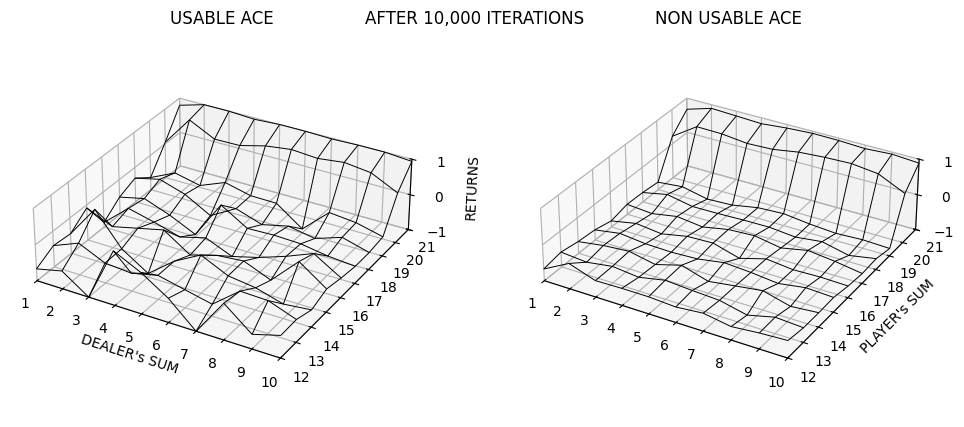

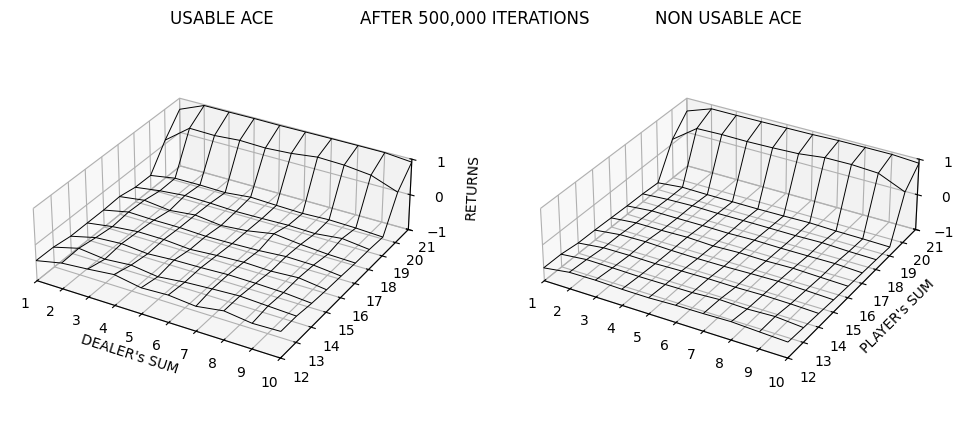

In [ ]:
BJ = BlackJack(toHit)
gamma = 1
num_episodes = [10, 500]
BJ.prediction(gamma, num_episodes)
BJ.plot()

# Experiment 7.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from typing import List, Tuple, Dict

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)

In [ ]:
def toHit(state: Tuple[int, int, bool]) -> bool:
    total, *_ = state
    return total < 20

In [ ]:
class BlackJack:
    def __init__(self, policy_func):
        self.pi = policy_func
        self.current_sum = range(12, 22)
        self.showing_card = range(1, 11)
        self.usable_ace = [True, False]
        self.values = dict()
        self.states = list(itertools.product(self.current_sum, self.showing_card, self.usable_ace))

    def initialise(self, pair: np.ndarray) -> Tuple[int, bool]:
        current_sum = pair.sum()
        usable_ace = False

        if 1 in pair:
            current_sum += 10
            usable_ace = True

        while current_sum < 11:
            deal = np.random.choice(self.cards)
            current_sum += deal
            if deal == 1:
                current_sum += 10
                usable_ace = True

        if current_sum == 11:
            current_sum += np.random.choice(self.cards)

        return current_sum, usable_ace

    def hit(self, current_sum: int, usable_ace: bool) -> Tuple[int, bool]:
        current_sum += np.random.choice(self.cards)
        if current_sum > 21 and usable_ace:
            current_sum -= 10
            usable_ace = False
        return current_sum, usable_ace

    def play(self) -> Tuple[List[Tuple[int, int, bool]], List[str], List[int]]:
        states, actions, rewards = [], [], []
        self.cards = np.minimum(np.arange(1, 14), 10)

        self.D_up, self.D_down = self.cards_D = np.random.choice(self.cards, size=2)
        self.cards_P = np.random.choice(self.cards, size=2)

        if set(self.cards_P) == {1, 10}:
            states.append((21, self.D_up, True))
            actions.append('stick')
            rewards.append(0 if set(self.cards_D) == {1, 10} else 1)
            return states, actions, rewards

        current_sum_P, usable_ace_P = self.initialise(self.cards_P)
        states.append((current_sum_P, self.D_up, usable_ace_P))

        while True:
            current_sum_P, _, usable_ace_P = states[-1]
            if self.pi(states[-1]):
                actions.append('HIT')
                current_sum_P, usable_ace_P = self.hit(current_sum_P, usable_ace_P)
                if current_sum_P > 21:
                    rewards.append(-1)
                    break
                else:
                    rewards.append(0)
                    states.append((current_sum_P, self.D_up, usable_ace_P))
            else:
                actions.append('STICK')
                current_sum_D, usable_ace_D = self.initialise(self.cards_D)
                while current_sum_D < 17:
                    current_sum_D, usable_ace_D = self.hit(current_sum_D, usable_ace_D)
                if current_sum_D > 21:
                    rewards.append(1)
                elif current_sum_D > current_sum_P:
                    rewards.append(-1)
                elif current_sum_D == current_sum_P:
                    rewards.append(0)
                else:
                    rewards.append(1)
                break

        return states, actions, rewards

    def prediction(self, gamma: float, num_episodes: List[int]):
        for num_episode in num_episodes:
            print(f'\nNUMBER OF EPISODES: {num_episode:,}')
            num_states = len(self.states)
            V = dict(zip(self.states, np.zeros(num_states)))
            returns = {state: [] for state in self.states}

            for episode in range(num_episode):
                episode_data = self.play()
                S_0Tm1, _, R_1T = episode_data
                G = 0
                for t, (St, _, Rt) in list(enumerate(zip(*episode_data)))[::-1]:
                    G = gamma * G + Rt
                    if St not in S_0Tm1[:t]:
                        returns[St].append(G)
                        V[St] = np.mean(returns[St])

            self.values[num_episode] = V

    def plot(self):
        for k in self.values.keys():
            fig = plt.figure(figsize=(14, 6))
            plt.suptitle(f'AFTER {k:,} ITERATIONS', fontsize=14)
            val = self.values[k]
            for i, ace in zip(range(1, 3), [True, False]):
                ax = fig.add_subplot(1, 2, i, projection='3d')
                ax.set_title('USABLE ACE' if ace else 'NON USABLE ACE')

                X, Y = np.meshgrid(self.showing_card, self.current_sum)
                Z = np.zeros_like(X).astype('float')

                for (cs, sc, ua) in val:
                    if ua == ace:
                        Z[cs - 12, sc - 1] = val[(cs, sc, ua)]

                ax.plot_wireframe(X, Y, Z, linewidth=0.8, color='black')

                ax.set_xlabel('DEALER\'S SUM')
                ax.set_ylabel('PLAYER\'S SUM')
                ax.set_zlabel('RETURNS')

                ax.set_xlim(1, 10)
                ax.set_ylim(12, 21)
                ax.set_zlim(-1, 1)
                ax.set_zticks([-1, 0, 1])
                ax.set_box_aspect([1, 1, 0.3])

            plt.tight_layout()
            plt.show()


NUMBER OF EPISODES: 10,000

NUMBER OF EPISODES: 500,000


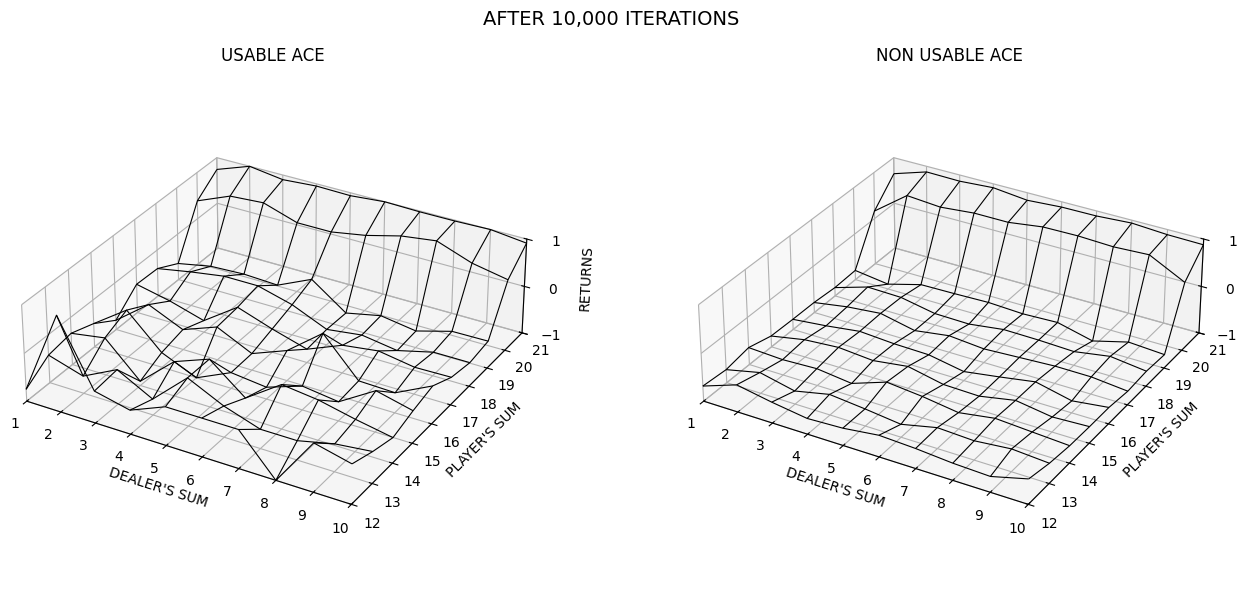

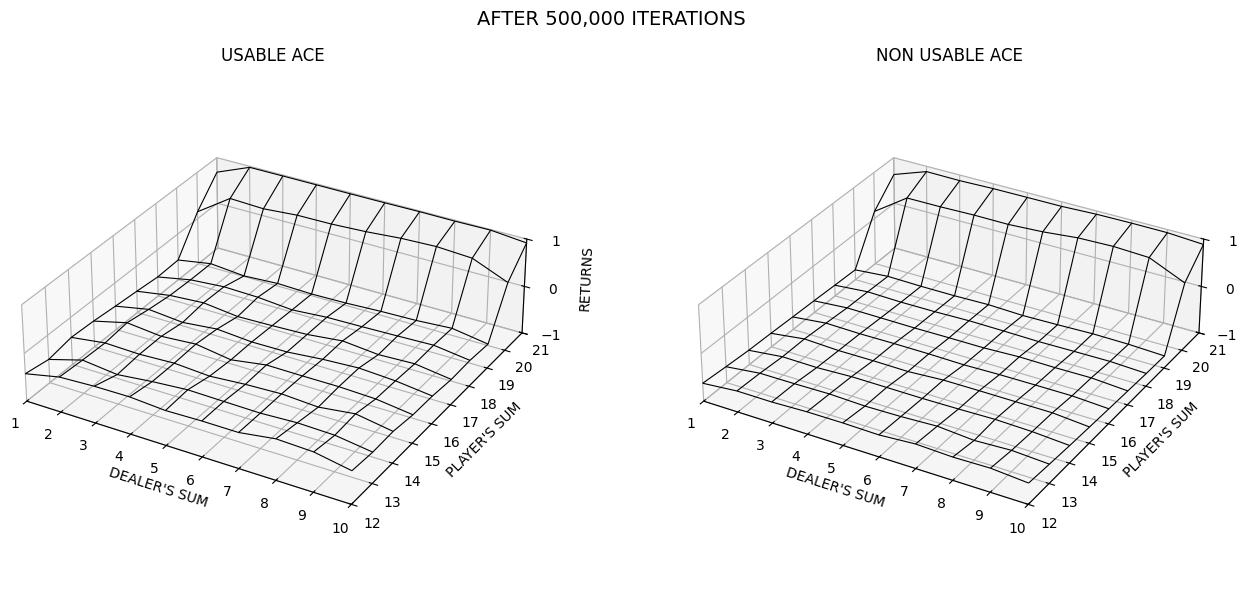

In [ ]:
# Running the implementation
BJ = BlackJack(toHit)
gamma = 1.0
num_episodes = [10000, 500000]
BJ.prediction(gamma, num_episodes)
BJ.plot()

# Experiment 8

**🧪 SARSA Implementation Code (Frozen Lake)**

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# SARSA Function
def sarsa(env, alpha=0.1, gamma=0.99, epsilon=0.1, episodes=10000):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    Q = np.zeros((n_states, n_actions))
    rewards = []

    def epsilon_greedy(state):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        return np.argmax(Q[state])

    for ep in range(episodes):
        state = env.reset()
        if isinstance(state, tuple):  # Ensure compatibility with newer Gym versions
            state = state[0]
        action = epsilon_greedy(state)
        total_reward = 0

        done = False
        while not done:
          step_result = env.step(action)

          if len(step_result) == 5:
            next_state, reward, terminated, truncated, info = step_result
            done = terminated or truncated
          else:
            next_state, reward, done, info = step_result

          next_action = epsilon_greedy(next_state)

          Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

          state, action = next_state, next_action
          total_reward += reward

        rewards.append(total_reward)

    return Q, rewards

**📊 Analysis Script (Q-table + Rewards)**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np

In [ ]:
# Temporary patch for deprecated np.bool8 used in some Gym environments
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

In [ ]:
# Run SARSA with default parameters
env = gym.make("FrozenLake-v1", is_slippery=True)
Q_init = np.zeros((env.observation_space.n, env.action_space.n))  # Save initial Q for comparison

In [ ]:
Q_final, rewards = sarsa(env)

In [ ]:
# Comparison & Stats
print("Initial Q-table:\n", Q_init)
print("\nFinal Q-table after training:\n", Q_final)
print("\nAverage reward over episodes:", np.mean(rewards))

Initial Q-table:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Final Q-table after training:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.85942190e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.02526364e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.00702990e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00

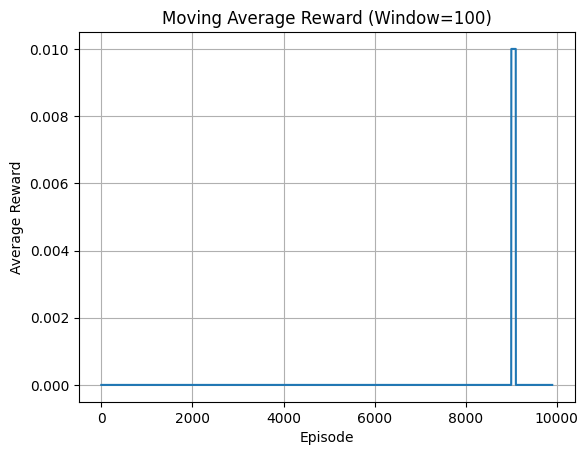

In [ ]:
# Plot reward trends
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("Moving Average Reward (Window=100)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.grid()
plt.show()

**⚙️ Experiment with Parameters**

In [ ]:
alphas = [0.1, 0.5]
gammas = [0.9, 0.99]
episodes_list = [2000, 5000, 10000]

In [ ]:
for alpha in alphas:
    for gamma in gammas:
        for ep_count in episodes_list:
            print(f"Running SARSA with alpha={alpha}, gamma={gamma}, episodes={ep_count}")
            Q, rewards = sarsa(env, alpha=alpha, gamma=gamma, episodes=ep_count)
            print(f"Mean reward: {np.mean(rewards)}\n")

Running SARSA with alpha=0.1, gamma=0.9, episodes=2000
Mean reward: 0.0

Running SARSA with alpha=0.1, gamma=0.9, episodes=5000
Mean reward: 0.0

Running SARSA with alpha=0.1, gamma=0.9, episodes=10000
Mean reward: 0.231

Running SARSA with alpha=0.1, gamma=0.99, episodes=2000
Mean reward: 0.0

Running SARSA with alpha=0.1, gamma=0.99, episodes=5000
Mean reward: 0.1216

Running SARSA with alpha=0.1, gamma=0.99, episodes=10000
Mean reward: 0.0628

Running SARSA with alpha=0.5, gamma=0.9, episodes=2000
Mean reward: 0.0

Running SARSA with alpha=0.5, gamma=0.9, episodes=5000
Mean reward: 0.0

Running SARSA with alpha=0.5, gamma=0.9, episodes=10000
Mean reward: 0.1021

Running SARSA with alpha=0.5, gamma=0.99, episodes=2000
Mean reward: 0.0

Running SARSA with alpha=0.5, gamma=0.99, episodes=5000
Mean reward: 0.0

Running SARSA with alpha=0.5, gamma=0.99, episodes=10000
Mean reward: 0.0



# Experiment 9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict

In [ ]:
# 1. Grid World Environment
class GridWorld:
    def __init__(self, size=(4, 4), terminal_states=[(3, 3)], obstacles=[]):
        self.rows, self.cols = size
        self.state = (0, 0)
        self.terminal_states = terminal_states
        self.obstacles = obstacles
        self.actions = ['up', 'down', 'left', 'right']
        self.reset()

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        row, col = self.state
        if action == 'up':
            row = max(0, row - 1)
        elif action == 'down':
            row = min(self.rows - 1, row + 1)
        elif action == 'left':
            col = max(0, col - 1)
        elif action == 'right':
            col = min(self.cols - 1, col + 1)

        next_state = (row, col)

        if next_state in self.obstacles:
            next_state = self.state  # hit wall

        reward = 1 if next_state in self.terminal_states else -0.04
        done = next_state in self.terminal_states
        self.state = next_state
        return next_state, reward, done

    def get_state_space(self):
        return [(i, j) for i in range(self.rows) for j in range(self.cols)]

    def get_action_space(self):
        return self.actions

In [ ]:
# 2. Q-Learning Function
def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = defaultdict(float)
    episode_rewards = []

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.choice(env.get_action_space())
            else:
                q_vals = [Q[(state, a)] for a in env.get_action_space()]
                action = env.get_action_space()[np.argmax(q_vals)]

            next_state, reward, done = env.step(action)
            next_max = max([Q[(next_state, a)] for a in env.get_action_space()])
            Q[(state, action)] += alpha * (reward + gamma * next_max - Q[(state, action)])

            state = next_state
            total_reward += reward

        episode_rewards.append(total_reward)
    return Q, episode_rewards

In [ ]:
# 3. Display Q-tables for each action separately
def print_q_tables_by_action(Q, env):
    # Initialize matrices for each action
    q_up = np.zeros((env.rows, env.cols))
    q_down = np.zeros((env.rows, env.cols))
    q_left = np.zeros((env.rows, env.cols))
    q_right = np.zeros((env.rows, env.cols))

    # Populate matrices with Q-values
    for state in env.get_state_space():
        q_up[state[0], state[1]] = Q[(state, 'up')]
        q_down[state[0], state[1]] = Q[(state, 'down')]
        q_left[state[0], state[1]] = Q[(state, 'left')]
        q_right[state[0], state[1]] = Q[(state, 'right')]

    # Display matrices
    print("Q-Table for Action: 'Up'")
    print(q_up)
    print("\nQ-Table for Action: 'Down'")
    print(q_down)
    print("\nQ-Table for Action: 'Left'")
    print(q_left)
    print("\nQ-Table for Action: 'Right'")
    print(q_right)

In [ ]:
# 4. Run once and show Q-tables
env = GridWorld()
print("Initial Q-Tables (all zeros):")
initial_Q = defaultdict(float)
print_q_tables_by_action(initial_Q, env)

Initial Q-Tables (all zeros):
Q-Table for Action: 'Up'
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-Table for Action: 'Down'
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-Table for Action: 'Left'
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-Table for Action: 'Right'
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
Q_final, rewards = q_learning(env, episodes=500)
print("Final Q-Tables after training:")
print_q_tables_by_action(Q_final, env)

Final Q-Tables after training:
Q-Table for Action: 'Up'
[[ 0.24470132  0.01656993  0.02590219 -0.0118804 ]
 [ 0.18983907  0.15156362  0.29129571  0.03997373]
 [-0.02200337 -0.01226473  0.114674    0.5649912 ]
 [-0.0118804  -0.00796    -0.004       0.        ]]

Q-Table for Action: 'Down'
[[ 0.426686    0.46326943  0.55065731  0.27236049]
 [ 0.05003292  0.42665834  0.540813    0.86      ]
 [-0.01838308 -0.0112     -0.004       1.        ]
 [-0.0118804  -0.00796    -0.004       0.        ]]

Q-Table for Action: 'Left'
[[ 0.22232767 -0.00994711 -0.01795588  0.03098731]
 [ 0.28269556  0.24987718  0.35272735  0.37165993]
 [-0.01960398 -0.008608    0.05285481  0.61370025]
 [-0.0118804  -0.00796    -0.00436     0.        ]]

Q-Table for Action: 'Right'
[[ 0.19178944  0.00320306 -0.0185872  -0.0118804 ]
 [ 0.51854     0.6206      0.734       0.62280398]
 [ 0.3095124   0.70227333  0.85944846  0.68932471]
 [-0.0148288   0.011444    0.271       0.        ]]


In [ ]:
# 5. Learning Curve for Different Alphas & Gammas
def plot_learning_curves():
    alphas = [0.1, 0.3, 0.5]
    gammas = [0.8, 0.9, 0.99]
    episodes = 300

    plt.figure(figsize=(12, 8))
    for alpha in alphas:
        for gamma in gammas:
            _, rewards = q_learning(env, episodes=episodes, alpha=alpha, gamma=gamma)
            plt.plot(range(episodes), rewards, label=f'α={alpha}, γ={gamma}')

    plt.title("Learning Curve: Rewards over Episodes")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward per Episode")
    plt.legend()
    plt.grid(True)
    plt.show()

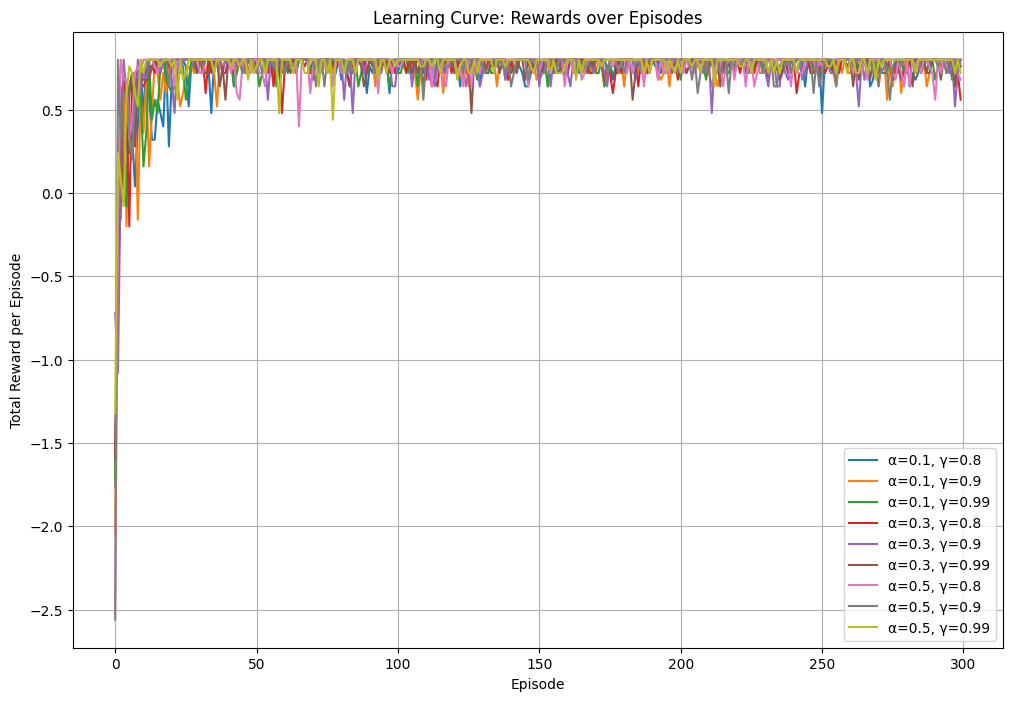

In [ ]:
plot_learning_curves()

# Experiment 10

In [ ]:
!pip install gym==0.26.2 pygame matplotlib numpy==1.24.4 --quiet
import os
os.kill(os.getpid(), 9)  # Restart runtime to apply changes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video

In [ ]:
# Environment setup
env = gym.make("CartPole-v1", render_mode="rgb_array")
n_actions = env.action_space.n

In [ ]:
# Discretization
def create_bins():
    bins = [
        np.linspace(-4.8, 4.8, 10),    # Cart position
        np.linspace(-5, 5, 10),        # Cart velocity
        np.linspace(-0.418, 0.418, 10),# Pole angle
        np.linspace(-5, 5, 10)         # Pole angular velocity
    ]
    return bins

In [ ]:
def discretize_state(state, bins):
    return tuple(int(np.digitize(s, b)) for s, b in zip(state, bins))

In [ ]:
# Q-Learning
def run_q_learning(alpha=0.1, gamma=0.99, eps=1.0, eps_min=0.01, eps_decay=0.995, n_episodes=500):
    Q = {}
    bins = create_bins()
    rewards = []
    best_episode = []
    best_reward = -np.inf
    for episode in range(n_episodes):
        obs, _ = env.reset()
        state = discretize_state(obs, bins)
        if state not in Q:
            Q[state] = np.zeros(n_actions)
        total_reward = 0
        done = False
        episode_actions = []
        while not done:
            action = np.random.choice(n_actions) if np.random.rand() < eps else np.argmax(Q[state])
            obs, reward, terminated, truncated, _ = env.step(action)
            episode_actions.append(action)
            done = terminated or truncated
            next_state = discretize_state(obs, bins)
            if next_state not in Q:
                Q[next_state] = np.zeros(n_actions)
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
            state = next_state
            total_reward += reward
        if total_reward > best_reward:
            best_reward = total_reward
            best_episode = episode_actions.copy()
        eps = max(eps_min, eps * eps_decay)
        rewards.append(total_reward)
    return Q, rewards, best_episode

In [ ]:
# SARSA
def run_sarsa(alpha=0.1, gamma=0.99, eps=1.0, eps_min=0.01, eps_decay=0.995, n_episodes=500):
    Q = {}
    bins = create_bins()
    rewards = []
    best_episode = []
    best_reward = -np.inf
    for episode in range(n_episodes):
        obs, _ = env.reset()
        state = discretize_state(obs, bins)
        if state not in Q:
            Q[state] = np.zeros(n_actions)
        action = np.random.choice(n_actions) if np.random.rand() < eps else np.argmax(Q[state])
        total_reward = 0
        done = False
        episode_actions = []
        while not done:
            obs, reward, terminated, truncated, _ = env.step(action)
            episode_actions.append(action)
            done = terminated or truncated
            next_state = discretize_state(obs, bins)
            if next_state not in Q:
                Q[next_state] = np.zeros(n_actions)
            next_action = np.random.choice(n_actions) if np.random.rand() < eps else np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action
            total_reward += reward
        if total_reward > best_reward:
            best_reward = total_reward
            best_episode = episode_actions.copy()
        eps = max(eps_min, eps * eps_decay)
        rewards.append(total_reward)
    return Q, rewards, best_episode

In [ ]:
# Plot rewards
def plot_rewards(q_rewards, s_rewards):
    plt.figure(figsize=(12, 5))
    plt.plot(q_rewards, label='Q-Learning')
    plt.plot(s_rewards, label='SARSA')
    plt.xlabel('Episodes')
    plt.ylabel('Total Rewards')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Agent animation (save as MP4)
def animate_episode(actions, filename="best_episode.mp4", fps=15):
    fig, ax = plt.subplots()
    frames = []
    obs, _ = env.reset()
    for action in actions:
        frame = env.render()
        frames.append([plt.imshow(frame, animated=True)])
        obs, _, terminated, truncated, _ = env.step(action)
        if terminated or truncated:
            break
    # Random actions towards the end of the best episode for more exploration
    for _ in range(50):  # add 50 more steps with random actions
        action = np.random.choice(n_actions)
        frame = env.render()
        frames.append([plt.imshow(frame, animated=True)])
        obs, _, terminated, truncated, _ = env.step(action)
        if terminated or truncated:
            break
    # Ensure animation runs at least 3 seconds
    while len(frames) < 3 * fps:  # pad with the last frame if not long enough
        frames.append(frames[-1])
    ani = animation.ArtistAnimation(fig, frames, interval=1000 // fps, blit=True)
    ani.save(filename, writer='ffmpeg', fps=fps)
    plt.close()

In [ ]:
# Train agents
print("Training Q-Learning...")
Q_qlearning, rewards_qlearning, best_q_episode = run_q_learning()
print("Training SARSA...")
Q_sarsa, rewards_sarsa, best_sarsa_episode = run_sarsa()

Training Q-Learning...
Training SARSA...


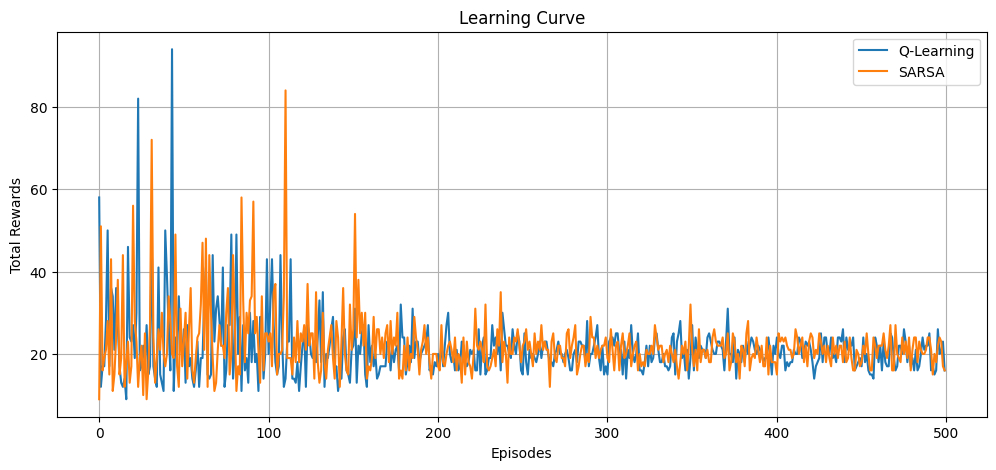

In [ ]:
# Plot curves
plot_rewards(rewards_qlearning, rewards_sarsa)

In [ ]:
# Save and display animations as MP4
print("Animating Q-Learning Agent...")
animate_episode(best_q_episode, "qlearning_best_episode.mp4")
print("Animating SARSA Agent...")
animate_episode(best_sarsa_episode, "sarsa_best_episode.mp4")

Animating Q-Learning Agent...
Animating SARSA Agent...


**Q-Learning Agent**

In [ ]:
# Display the saved videos
Video("qlearning_best_episode.mp4", embed=True)

**SARSA Agent**

In [ ]:
Video("sarsa_best_episode.mp4", embed=True)

In [ ]:
# Calculate and print total cumulative reward for both methods
total_reward_qlearning = np.sum(rewards_qlearning)
total_reward_sarsa = np.sum(rewards_sarsa)

In [ ]:
print(f"Total Cumulative Reward for Q-Learning: {total_reward_qlearning}")
print(f"Total Cumulative Reward for SARSA: {total_reward_sarsa}")

Total Cumulative Reward for Q-Learning: 10664.0
Total Cumulative Reward for SARSA: 11042.0
